<a href="https://colab.research.google.com/github/pratsup/gitlearn/blob/main/AnalisisKegiatan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Install Library

In [ ]:
!pip install openai pandas matplotlib seaborn plotly

In [1]:
import openai
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import json
import time
from tqdm import tqdm

## Openai API Authorization

In [2]:
from google.colab import userdata

# Access the secret
api_key = userdata.get('openapi_key')

In [3]:
openai.api_key=api_key

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Social Media Analysis Function

In [ ]:
from openai import OpenAI

client = OpenAI(api_key=api_key)  # Optional if already set

def classify_opinion(text):
    prompt = f"apakah teks ini merupakan opini masyarakat? jawab ya atau tidak:\n\n\"{text}\""
    response = client.chat.completions.create(
        model="gpt-4.1",
        messages=[{"role": "user", "content": prompt}]
    )
    return response.choices[0].message.content.strip()

def analyze_sentiment(text):
    prompt = f"tentukan sentimen dari teks ini? jawab dengan positive, negative atau neutral:\n\n\"{text}\""
    response = client.chat.completions.create(
        model="gpt-4.1",
        messages=[{"role": "user", "content": prompt}]
    )
    out = response.choices[0].message.content.strip()
    if "positive" in out:
        return "positive"
    elif "negative" in out:
        return "negative"
    else:
        return "neutral"

def extract_info(text):
    prompt = f"lakukan ekstraksi informasi dari teks berikut ini, meliputi named entities beserta entity type seperti person, organization, etc, hashtags, dan topik:\n\n\"{text}\" return the result in json format"
    response = client.chat.completions.create(
        model="gpt-4.1",
        messages=[{"role": "user", "content": prompt}]
    )
    return response.choices[0].message.content.strip()

In [ ]:
# Membaca file CSV
data = pd.read_csv('/content/drive/MyDrive/Anmedsos/xdata/result_ppn12persen_25.csv')

In [ ]:
data.columns

Index(['conversation_id_str', 'created_at', 'favorite_count', 'full_text',
       'id_str', 'image_url', 'in_reply_to_screen_name', 'lang', 'location',
       'quote_count', 'reply_count', 'retweet_count', 'tweet_url',
       'user_id_str', 'username'],
      dtype='object')

In [ ]:
dftext = data[['conversation_id_str','created_at','username','full_text','in_reply_to_screen_name','image_url','location','lang']].rename(columns={'full_text': 'text'})
dftext.head()

,conversation_id_str,created_at,username,text,in_reply_to_screen_name,image_url,location,lang
0,1868967525587018054,Tue Dec 17 10:32:36 +0000 2024,NenkMonica,Millenial saja cerdas mengupas Kenaikan PPN 12...,NaN,https://pbs.twimg.com/ext_tw_video_thumb/18689...,NaN,in
1,1868940776480309757,Tue Dec 17 08:46:19 +0000 2024,BosPurwa,CLEAR YA Bahwa kenaikan PPN 12% itu salah satu...,NaN,https://pbs.twimg.com/ext_tw_video_thumb/18689...,NaN,in
2,1871356459679990142,Tue Dec 24 00:45:22 +0000 2024,BocorAlusPol,Kemenkue udah bingung kayaknya dijadiin tameng...,NaN,https://pbs.twimg.com/tweet_video_thumb/Gfhkxx...,NaN,in
3,1872850123308581074,Sat Dec 28 03:40:39 +0000 2024,secr3thm4nz56,TOLAK PPN 12 PERSEN.... BEM SI KERAKYATAN MENG...,NaN,https://pbs.twimg.com/ext_tw_video_thumb/18728...,NaN,in
4,1875770423985754437,Sun Jan 05 05:04:53 +0000 2025,Metro_TV,Pemerintah telah memutuskan Pajak Pertambahan ...,NaN,https://pbs.twimg.com/ext_tw_video_thumb/18757...,NaN,in


In [ ]:
text = "kebijakan ppn 12% yg dikeluarkan oleh kementerian keuangan merupakan jalan pintas yang membebani ekonomi rakyat"

In [ ]:
classify_opinion(text)

'Ya.'

In [ ]:
analyze_sentiment(text)

'negative'

In [ ]:
extract_info(text).replace("\n", "")

'{  "named_entities": [    {      "entity": "kementerian keuangan",      "type": "organization"    }  ],  "hashtags": [],  "topics": [    "kebijakan pemerintah",    "ppn 12%",    "ekonomi rakyat",    "pajak"  ]}'

In [ ]:
data2 = dftext[:50]

In [ ]:
data2['label'] = data2['text'].apply(analyze_sentiment)

<ipython-input-19-528b73ca8f64>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['label'] = data2['text'].apply(analyze_sentiment)


In [ ]:
data2.head(50)

,conversation_id_str,created_at,username,text,in_reply_to_screen_name,image_url,location,lang,label
0,1868967525587018054,Tue Dec 17 10:32:36 +0000 2024,NenkMonica,Millenial saja cerdas mengupas Kenaikan PPN 12...,NaN,https://pbs.twimg.com/ext_tw_video_thumb/18689...,NaN,in,negative
1,1868940776480309757,Tue Dec 17 08:46:19 +0000 2024,BosPurwa,CLEAR YA Bahwa kenaikan PPN 12% itu salah satu...,NaN,https://pbs.twimg.com/ext_tw_video_thumb/18689...,NaN,in,negative
2,1871356459679990142,Tue Dec 24 00:45:22 +0000 2024,BocorAlusPol,Kemenkue udah bingung kayaknya dijadiin tameng...,NaN,https://pbs.twimg.com/tweet_video_thumb/Gfhkxx...,NaN,in,negative
3,1872850123308581074,Sat Dec 28 03:40:39 +0000 2024,secr3thm4nz56,TOLAK PPN 12 PERSEN.... BEM SI KERAKYATAN MENG...,NaN,https://pbs.twimg.com/ext_tw_video_thumb/18728...,NaN,in,negative
4,1875770423985754437,Sun Jan 05 05:04:53 +0000 2025,Metro_TV,Pemerintah telah memutuskan Pajak Pertambahan ...,NaN,https://pbs.twimg.com/ext_tw_video_thumb/18757...,NaN,in,neutral
5,1876602234877907424,Tue Jan 07 12:10:13 +0000 2025,KATADATAcoid,Pemerintah memutuskan untuk membatalkan kebija...,NaN,https://pbs.twimg.com/ext_tw_video_thumb/18766...,NaN,in,negative
6,1876129599119331698,Mon Jan 06 04:52:07 +0000 2025,Metro_TV,Memasuki awal tahun harga berbagai jenis beras...,NaN,https://pbs.twimg.com/ext_tw_video_thumb/18761...,NaN,in,negative
7,1870378679391633565,Sat Dec 21 08:00:01 +0000 2024,ARSIPAJA,Menyikapi kenaikan PPN 12% PGI: PBNU: https://...,NaN,https://pbs.twimg.com/media/GfTKGXaa0AA7aXM.jpg,NaN,in,neutral
8,1859768420134461592,Fri Nov 22 01:18:38 +0000 2024,KangManto123,Batalkan buuuu.... Kami menolak PPN 12% #Tolak...,NaN,https://pbs.twimg.com/media/Gc85hcFaAAUrdB_.jpg,NaN,in,negative
9,1876136053964443822,Mon Jan 06 05:17:46 +0000 2025,PDemokrat,Dukung PPN 12 Persen untuk Barang Mewah Ketua ...,NaN,https://pbs.twimg.com/ext_tw_video_thumb/18761...,NaN,in,positive


## Data Visualization

In [ ]:
data2["date"] = pd.to_datetime(data2["created_at"])
data2["day"] = data2["date"].dt.date
data2["month"] = data2["date"].dt.to_period("M")

<ipython-input-21-0ee8025a8c9e>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data2["date"] = pd.to_datetime(data2["created_at"])
<ipython-input-21-0ee8025a8c9e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2["date"] = pd.to_datetime(data2["created_at"])
<ipython-input-21-0ee8025a8c9e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2["day"] = data2["dat

In [ ]:
data2.head()

,conversation_id_str,created_at,username,text,in_reply_to_screen_name,image_url,location,lang,label,date,day,month
0,1868967525587018054,Tue Dec 17 10:32:36 +0000 2024,NenkMonica,Millenial saja cerdas mengupas Kenaikan PPN 12...,NaN,https://pbs.twimg.com/ext_tw_video_thumb/18689...,NaN,in,negative,2024-12-17 10:32:36+00:00,2024-12-17,2024-12
1,1868940776480309757,Tue Dec 17 08:46:19 +0000 2024,BosPurwa,CLEAR YA Bahwa kenaikan PPN 12% itu salah satu...,NaN,https://pbs.twimg.com/ext_tw_video_thumb/18689...,NaN,in,negative,2024-12-17 08:46:19+00:00,2024-12-17,2024-12
2,1871356459679990142,Tue Dec 24 00:45:22 +0000 2024,BocorAlusPol,Kemenkue udah bingung kayaknya dijadiin tameng...,NaN,https://pbs.twimg.com/tweet_video_thumb/Gfhkxx...,NaN,in,negative,2024-12-24 00:45:22+00:00,2024-12-24,2024-12
3,1872850123308581074,Sat Dec 28 03:40:39 +0000 2024,secr3thm4nz56,TOLAK PPN 12 PERSEN.... BEM SI KERAKYATAN MENG...,NaN,https://pbs.twimg.com/ext_tw_video_thumb/18728...,NaN,in,negative,2024-12-28 03:40:39+00:00,2024-12-28,2024-12
4,1875770423985754437,Sun Jan 05 05:04:53 +0000 2025,Metro_TV,Pemerintah telah memutuskan Pajak Pertambahan ...,NaN,https://pbs.twimg.com/ext_tw_video_thumb/18757...,NaN,in,neutral,2025-01-05 05:04:53+00:00,2025-01-05,2025-01


### Daily Trend of Sentiment

<ipython-input-23-6d36d65b94bd>:9: UserWarning: Glyph 128198 (\N{TEAR-OFF CALENDAR}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128198 (\N{TEAR-OFF CALENDAR}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


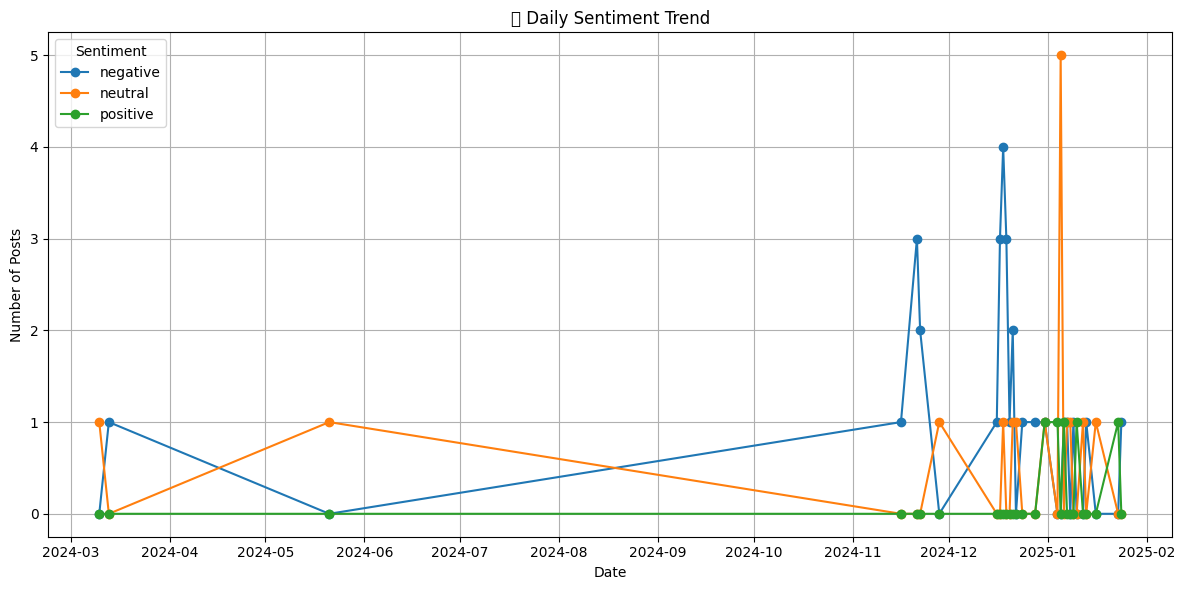

In [ ]:
daily_sentiment = data2.groupby(["day", "label"]).size().unstack(fill_value=0)

daily_sentiment.plot(figsize=(12, 6), marker='o')
plt.title("📆 Daily Sentiment Trend")
plt.xlabel("Date")
plt.ylabel("Number of Posts")
plt.legend(title="Sentiment")
plt.grid(True)
plt.tight_layout()
plt.show()

### Monthly Comparisson of Sentiment

<ipython-input-24-2f77b6ccad8b>:9: UserWarning: Glyph 128467 (\N{SPIRAL CALENDAR PAD}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128467 (\N{SPIRAL CALENDAR PAD}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


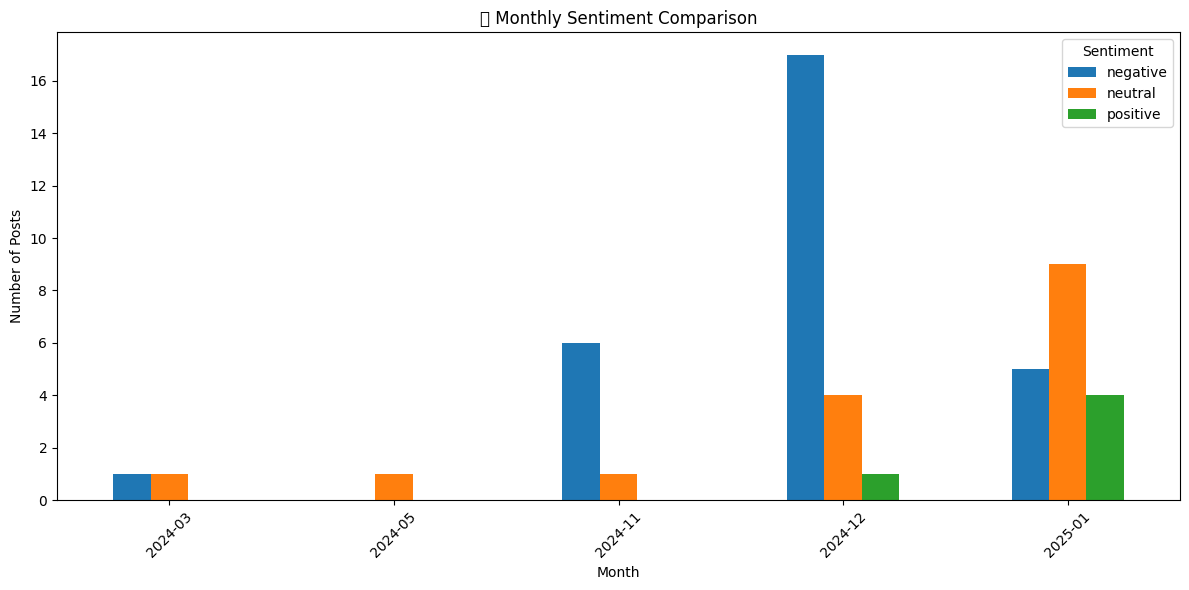

In [ ]:
monthly_sentiment = data2.groupby(["month", "label"]).size().unstack(fill_value=0)

monthly_sentiment.plot(kind="bar", figsize=(12, 6))
plt.title("🗓️ Monthly Sentiment Comparison")
plt.xlabel("Month")
plt.ylabel("Number of Posts")
plt.xticks(rotation=45)
plt.legend(title="Sentiment")
plt.tight_layout()
plt.show()


## Additional: Bulk Prompt

### Sentiment Classification

In [ ]:
def analyze_sentiment_bulk(texts):
    # Build the bulk prompt
    prompt = "Tentukan sentimen dari teks-teks berikut. Jawab hanya dalam format JSON array seperti:\n" \
             '[{"index": 0, "sentiment": "positive"}, {"index": 1, "sentiment": "neutral"}]\n\n'

    for i, text in enumerate(texts):
        prompt += f"{i}. {text}\n"

    # Send to OpenAI
    response = client.chat.completions.create(
        model="gpt-4.1",
        messages=[{"role": "user", "content": prompt}],
        temperature=0.2,
    )

    content = response.choices[0].message.content.strip()

    # Parse JSON array from response
    import json, re

    try:
        json_string = re.search(r'\[.*\]', content, re.DOTALL).group(0)
        results = json.loads(json_string)
        return results
    except Exception as e:
        print("Failed to parse JSON:\n", content)
        raise e


In [ ]:
# Sample DataFrame
dfbulk = dftext[:10]

# Run bulk sentiment analysis
results = analyze_sentiment_bulk(dfbulk["text"].tolist())

# Store back in DataFrame
dfbulk["sentiment"] = ""
for r in results:
    dfbulk.loc[r["index"], "sentiment"] = r["sentiment"]


<ipython-input-26-036cfa0fe7f9>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfbulk["sentiment"] = ""


In [ ]:
dfbulk.head(10)

,conversation_id_str,created_at,username,text,in_reply_to_screen_name,image_url,location,lang,sentiment
0,1868967525587018054,Tue Dec 17 10:32:36 +0000 2024,NenkMonica,Millenial saja cerdas mengupas Kenaikan PPN 12...,NaN,https://pbs.twimg.com/ext_tw_video_thumb/18689...,NaN,in,negative
1,1868940776480309757,Tue Dec 17 08:46:19 +0000 2024,BosPurwa,CLEAR YA Bahwa kenaikan PPN 12% itu salah satu...,NaN,https://pbs.twimg.com/ext_tw_video_thumb/18689...,NaN,in,negative
2,1871356459679990142,Tue Dec 24 00:45:22 +0000 2024,BocorAlusPol,Kemenkue udah bingung kayaknya dijadiin tameng...,NaN,https://pbs.twimg.com/tweet_video_thumb/Gfhkxx...,NaN,in,negative
3,1872850123308581074,Sat Dec 28 03:40:39 +0000 2024,secr3thm4nz56,TOLAK PPN 12 PERSEN.... BEM SI KERAKYATAN MENG...,NaN,https://pbs.twimg.com/ext_tw_video_thumb/18728...,NaN,in,negative
4,1875770423985754437,Sun Jan 05 05:04:53 +0000 2025,Metro_TV,Pemerintah telah memutuskan Pajak Pertambahan ...,NaN,https://pbs.twimg.com/ext_tw_video_thumb/18757...,NaN,in,neutral
5,1876602234877907424,Tue Jan 07 12:10:13 +0000 2025,KATADATAcoid,Pemerintah memutuskan untuk membatalkan kebija...,NaN,https://pbs.twimg.com/ext_tw_video_thumb/18766...,NaN,in,neutral
6,1876129599119331698,Mon Jan 06 04:52:07 +0000 2025,Metro_TV,Memasuki awal tahun harga berbagai jenis beras...,NaN,https://pbs.twimg.com/ext_tw_video_thumb/18761...,NaN,in,negative
7,1870378679391633565,Sat Dec 21 08:00:01 +0000 2024,ARSIPAJA,Menyikapi kenaikan PPN 12% PGI: PBNU: https://...,NaN,https://pbs.twimg.com/media/GfTKGXaa0AA7aXM.jpg,NaN,in,neutral
8,1859768420134461592,Fri Nov 22 01:18:38 +0000 2024,KangManto123,Batalkan buuuu.... Kami menolak PPN 12% #Tolak...,NaN,https://pbs.twimg.com/media/Gc85hcFaAAUrdB_.jpg,NaN,in,negative
9,1876136053964443822,Mon Jan 06 05:17:46 +0000 2025,PDemokrat,Dukung PPN 12 Persen untuk Barang Mewah Ketua ...,NaN,https://pbs.twimg.com/ext_tw_video_thumb/18761...,NaN,in,positive


In [ ]:
def process_sentiment_in_batches(df, text_col="text", batch_size=50):
    df["sentiment"] = ""  # Create empty column

    num_rows = len(df)
    for i in range(0, num_rows, batch_size):
        batch_df = df.iloc[i:i + batch_size]
        batch_texts = batch_df[text_col].tolist()

        try:
            results = analyze_sentiment_bulk(batch_texts)
            for r in results:
                df.at[i + r["index"], "sentiment"] = r["sentiment"]
        except Exception as e:
            print(f"Error in batch {i}–{i + batch_size}: {e}")

    return df


In [ ]:
df_result = process_sentiment_in_batches(dftext, text_col="text", batch_size=50)

In [ ]:
df_result.columns

Index(['conversation_id_str', 'created_at', 'username', 'text',
       'in_reply_to_screen_name', 'image_url', 'location', 'lang',
       'sentiment'],
      dtype='object')

In [ ]:
df_result.describe()

,conversation_id_str,location
count,2.190000e+02,0.0
mean,1.870025e+18,NaN
std,1.960308e+16,NaN
min,1.766069e+18,NaN
25%,1.869667e+18,NaN
50%,1.875817e+18,NaN
75%,1.877217e+18,NaN
max,1.883873e+18,NaN


In [ ]:
df_result.head(50)

,conversation_id_str,created_at,username,text,in_reply_to_screen_name,image_url,location,lang,sentiment
0,1868967525587018054,Tue Dec 17 10:32:36 +0000 2024,NenkMonica,Millenial saja cerdas mengupas Kenaikan PPN 12...,NaN,https://pbs.twimg.com/ext_tw_video_thumb/18689...,NaN,in,negative
1,1868940776480309757,Tue Dec 17 08:46:19 +0000 2024,BosPurwa,CLEAR YA Bahwa kenaikan PPN 12% itu salah satu...,NaN,https://pbs.twimg.com/ext_tw_video_thumb/18689...,NaN,in,negative
2,1871356459679990142,Tue Dec 24 00:45:22 +0000 2024,BocorAlusPol,Kemenkue udah bingung kayaknya dijadiin tameng...,NaN,https://pbs.twimg.com/tweet_video_thumb/Gfhkxx...,NaN,in,negative
3,1872850123308581074,Sat Dec 28 03:40:39 +0000 2024,secr3thm4nz56,TOLAK PPN 12 PERSEN.... BEM SI KERAKYATAN MENG...,NaN,https://pbs.twimg.com/ext_tw_video_thumb/18728...,NaN,in,negative
4,1875770423985754437,Sun Jan 05 05:04:53 +0000 2025,Metro_TV,Pemerintah telah memutuskan Pajak Pertambahan ...,NaN,https://pbs.twimg.com/ext_tw_video_thumb/18757...,NaN,in,neutral
5,1876602234877907424,Tue Jan 07 12:10:13 +0000 2025,KATADATAcoid,Pemerintah memutuskan untuk membatalkan kebija...,NaN,https://pbs.twimg.com/ext_tw_video_thumb/18766...,NaN,in,neutral
6,1876129599119331698,Mon Jan 06 04:52:07 +0000 2025,Metro_TV,Memasuki awal tahun harga berbagai jenis beras...,NaN,https://pbs.twimg.com/ext_tw_video_thumb/18761...,NaN,in,negative
7,1870378679391633565,Sat Dec 21 08:00:01 +0000 2024,ARSIPAJA,Menyikapi kenaikan PPN 12% PGI: PBNU: https://...,NaN,https://pbs.twimg.com/media/GfTKGXaa0AA7aXM.jpg,NaN,in,neutral
8,1859768420134461592,Fri Nov 22 01:18:38 +0000 2024,KangManto123,Batalkan buuuu.... Kami menolak PPN 12% #Tolak...,NaN,https://pbs.twimg.com/media/Gc85hcFaAAUrdB_.jpg,NaN,in,negative
9,1876136053964443822,Mon Jan 06 05:17:46 +0000 2025,PDemokrat,Dukung PPN 12 Persen untuk Barang Mewah Ketua ...,NaN,https://pbs.twimg.com/ext_tw_video_thumb/18761...,NaN,in,positive


### Information Extraction

In [ ]:
def extract_info_bulk(texts):
    """
    Extracts structured info (named entities, hashtags, topics) from multiple texts using OpenAI.
    Uses a single API call per batch and returns results as a dictionary indexed by row.
    """
    input_data = {str(i): text for i, text in enumerate(texts)}

    # Construct prompt
    prompt = (
        "Lakukan ekstraksi informasi dari teks berikut ini, meliputi:\n"
        "- named entities beserta entity type seperti person, organization, etc,\n"
        "- hashtags,\n"
        "- topik.\n\n"
        "Return the result in JSON array format only. Example format:\n"
        '[{"named_entities": [{"entity": "kementerian keuangan","type": "organization"}],'
        '"hashtags": [], "topik": ["PPN","kebijakan fiskal","ekonomi rakyat","kebijakan pemerintah"]}]\n\n'
        "Teks:\n"
    )

    for i, text in input_data.items():
        prompt += f"[{i}]: \"{text}\"\n"

    try:
        response = client.chat.completions.create(
            model="gpt-4.1",
            messages=[{"role": "user", "content": prompt}],
            temperature=0.2
        )
        # Expecting a JSON array
        raw_result = json.loads(response.choices[0].message.content)

        # Rebuild as dict indexed by original order
        result_dict = {i: item for i, item in enumerate(raw_result)}
        return result_dict

    except Exception as e:
        print("Error during batch:", e)
        return {}

In [ ]:
def process_ifextract_in_batches(df, text_col="text", batch_size=50):
    df["sentiment"] = ""  # Create empty column

    num_rows = len(df)
    for i in range(0, num_rows, batch_size):
        batch_df = df.iloc[i:i + batch_size]
        batch_texts = batch_df[text_col].tolist()

        try:
            results = extract_info_bulk(batch_texts.tolist())
            df['extracted_info'].index.map(lambda idx: results.get(idx, {}))
        except Exception as e:
            print(f"Error in batch {i}–{i + batch_size}: {e}")

    return df

In [ ]:
# Run bulk sentiment analysis
ifresults = extract_info_bulk(dfbulk["text"].tolist())

# Store back in DataFrame
dfbulk["info_result"] = ""
dfbulk["info_result"] = dfbulk.index.map(lambda idx: ifresults.get(idx, {}))

<ipython-input-35-1194822ac130>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfbulk["info_result"] = ""
<ipython-input-35-1194822ac130>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfbulk["info_result"] = dfbulk.index.map(lambda idx: ifresults.get(idx, {}))


In [ ]:
dfbulk.head(10)

,conversation_id_str,created_at,username,text,in_reply_to_screen_name,image_url,location,lang,sentiment,info_result
0,1868967525587018054,Tue Dec 17 10:32:36 +0000 2024,NenkMonica,Millenial saja cerdas mengupas Kenaikan PPN 12...,NaN,https://pbs.twimg.com/ext_tw_video_thumb/18689...,NaN,in,negative,"{'named_entities': [{'entity': 'Millenial', 't..."
1,1868940776480309757,Tue Dec 17 08:46:19 +0000 2024,BosPurwa,CLEAR YA Bahwa kenaikan PPN 12% itu salah satu...,NaN,https://pbs.twimg.com/ext_tw_video_thumb/18689...,NaN,in,negative,"{'named_entities': [{'entity': 'pemerintah', '..."
2,1871356459679990142,Tue Dec 24 00:45:22 +0000 2024,BocorAlusPol,Kemenkue udah bingung kayaknya dijadiin tameng...,NaN,https://pbs.twimg.com/tweet_video_thumb/Gfhkxx...,NaN,in,negative,"{'named_entities': [{'entity': 'Kemenkue', 'ty..."
3,1872850123308581074,Sat Dec 28 03:40:39 +0000 2024,secr3thm4nz56,TOLAK PPN 12 PERSEN.... BEM SI KERAKYATAN MENG...,NaN,https://pbs.twimg.com/ext_tw_video_thumb/18728...,NaN,in,negative,{'named_entities': [{'entity': 'BEM SI KERAKYA...
4,1875770423985754437,Sun Jan 05 05:04:53 +0000 2025,Metro_TV,Pemerintah telah memutuskan Pajak Pertambahan ...,NaN,https://pbs.twimg.com/ext_tw_video_thumb/18757...,NaN,in,neutral,"{'named_entities': [{'entity': 'Pemerintah', '..."
5,1876602234877907424,Tue Jan 07 12:10:13 +0000 2025,KATADATAcoid,Pemerintah memutuskan untuk membatalkan kebija...,NaN,https://pbs.twimg.com/ext_tw_video_thumb/18766...,NaN,in,neutral,"{'named_entities': [{'entity': 'Pemerintah', '..."
6,1876129599119331698,Mon Jan 06 04:52:07 +0000 2025,Metro_TV,Memasuki awal tahun harga berbagai jenis beras...,NaN,https://pbs.twimg.com/ext_tw_video_thumb/18761...,NaN,in,negative,"{'named_entities': [{'entity': 'Bandung', 'typ..."
7,1870378679391633565,Sat Dec 21 08:00:01 +0000 2024,ARSIPAJA,Menyikapi kenaikan PPN 12% PGI: PBNU: https://...,NaN,https://pbs.twimg.com/media/GfTKGXaa0AA7aXM.jpg,NaN,in,neutral,"{'named_entities': [{'entity': 'PGI', 'type': ..."
8,1859768420134461592,Fri Nov 22 01:18:38 +0000 2024,KangManto123,Batalkan buuuu.... Kami menolak PPN 12% #Tolak...,NaN,https://pbs.twimg.com/media/Gc85hcFaAAUrdB_.jpg,NaN,in,negative,"{'named_entities': [], 'hashtags': ['#TolakPPN..."
9,1876136053964443822,Mon Jan 06 05:17:46 +0000 2025,PDemokrat,Dukung PPN 12 Persen untuk Barang Mewah Ketua ...,NaN,https://pbs.twimg.com/ext_tw_video_thumb/18761...,NaN,in,positive,{'named_entities': [{'entity': 'Partai Demokra...


In [ ]:
def apply_extract_info_bulk(df, text_col="text", batch_size=50):
    """
    Applies extract_info_bulk to a DataFrame in batches and stores JSON array into `info_result`.
    """
    all_results = {}

    for i in tqdm(range(0, len(df), batch_size)):
        batch = df.iloc[i:i+batch_size]
        texts = batch[text_col].tolist()
        batch_result = extract_info_bulk(texts)
        len(batch_result)

        for j, info in batch_result.items():
            all_results[batch.index[j]] = info

        time.sleep(0.5)  # Avoid API rate limits
    return all_results

In [ ]:
all_results = apply_extract_info_bulk(df_result, text_col="text", batch_size=20)

100%|██████████| 11/11 [03:30<00:00, 19.11s/it]


In [ ]:
all_results

{0: {'named_entities': [{'entity': 'Millenial', 'type': 'person'},
   {'entity': 'Kolonial', 'type': 'person'}],
  'hashtags': [],
  'topik': ['PPN 12%', 'kenaikan pajak', 'generasi muda', 'kritik sosial']},
 1: {'named_entities': [{'entity': 'pemerintah', 'type': 'organization'}],
  'hashtags': [],
  'topik': ['PPN 12%',
   'program makan gizi gratis',
   'korupsi',
   'kebijakan pemerintah']},
 2: {'named_entities': [{'entity': 'Kemenkue', 'type': 'organization'},
   {'entity': 'DPR', 'type': 'organization'},
   {'entity': 'pemerintah', 'type': 'organization'}],
  'hashtags': [],
  'topik': ['PPN 12%', 'kebijakan fiskal', 'kesepakatan pemerintah dan DPR']},
 3: {'named_entities': [{'entity': 'BEM SI KERAKYATAN',
    'type': 'organization'},
   {'entity': 'pemerintah', 'type': 'organization'}],
  'hashtags': ['#TurunkanPaksaFufufafa'],
  'topik': ['PPN 12%', 'penolakan kebijakan', 'aksi mahasiswa']},
 4: {'named_entities': [{'entity': 'Pemerintah', 'type': 'organization'},
   {'entity

In [ ]:
df_result["extracted_info"] = df_result.index.map(lambda idx: all_results.get(idx, {}))

In [ ]:
df_result.head(10)

,conversation_id_str,created_at,username,text,in_reply_to_screen_name,image_url,location,lang,sentiment,extracted_info
0,1868967525587018054,Tue Dec 17 10:32:36 +0000 2024,NenkMonica,Millenial saja cerdas mengupas Kenaikan PPN 12...,NaN,https://pbs.twimg.com/ext_tw_video_thumb/18689...,NaN,in,negative,"{'named_entities': [{'entity': 'Millenial', 't..."
1,1868940776480309757,Tue Dec 17 08:46:19 +0000 2024,BosPurwa,CLEAR YA Bahwa kenaikan PPN 12% itu salah satu...,NaN,https://pbs.twimg.com/ext_tw_video_thumb/18689...,NaN,in,negative,"{'named_entities': [{'entity': 'pemerintah', '..."
2,1871356459679990142,Tue Dec 24 00:45:22 +0000 2024,BocorAlusPol,Kemenkue udah bingung kayaknya dijadiin tameng...,NaN,https://pbs.twimg.com/tweet_video_thumb/Gfhkxx...,NaN,in,negative,"{'named_entities': [{'entity': 'Kemenkue', 'ty..."
3,1872850123308581074,Sat Dec 28 03:40:39 +0000 2024,secr3thm4nz56,TOLAK PPN 12 PERSEN.... BEM SI KERAKYATAN MENG...,NaN,https://pbs.twimg.com/ext_tw_video_thumb/18728...,NaN,in,negative,{'named_entities': [{'entity': 'BEM SI KERAKYA...
4,1875770423985754437,Sun Jan 05 05:04:53 +0000 2025,Metro_TV,Pemerintah telah memutuskan Pajak Pertambahan ...,NaN,https://pbs.twimg.com/ext_tw_video_thumb/18757...,NaN,in,neutral,"{'named_entities': [{'entity': 'Pemerintah', '..."
5,1876602234877907424,Tue Jan 07 12:10:13 +0000 2025,KATADATAcoid,Pemerintah memutuskan untuk membatalkan kebija...,NaN,https://pbs.twimg.com/ext_tw_video_thumb/18766...,NaN,in,neutral,"{'named_entities': [{'entity': 'Pemerintah', '..."
6,1876129599119331698,Mon Jan 06 04:52:07 +0000 2025,Metro_TV,Memasuki awal tahun harga berbagai jenis beras...,NaN,https://pbs.twimg.com/ext_tw_video_thumb/18761...,NaN,in,negative,"{'named_entities': [{'entity': 'Bandung', 'typ..."
7,1870378679391633565,Sat Dec 21 08:00:01 +0000 2024,ARSIPAJA,Menyikapi kenaikan PPN 12% PGI: PBNU: https://...,NaN,https://pbs.twimg.com/media/GfTKGXaa0AA7aXM.jpg,NaN,in,neutral,"{'named_entities': [{'entity': 'PGI', 'type': ..."
8,1859768420134461592,Fri Nov 22 01:18:38 +0000 2024,KangManto123,Batalkan buuuu.... Kami menolak PPN 12% #Tolak...,NaN,https://pbs.twimg.com/media/Gc85hcFaAAUrdB_.jpg,NaN,in,negative,"{'named_entities': [], 'hashtags': ['#TolakPPN..."
9,1876136053964443822,Mon Jan 06 05:17:46 +0000 2025,PDemokrat,Dukung PPN 12 Persen untuk Barang Mewah Ketua ...,NaN,https://pbs.twimg.com/ext_tw_video_thumb/18761...,NaN,in,positive,{'named_entities': [{'entity': 'Partai Demokra...


### Save to File

In [ ]:
df_result.to_csv('/content/drive/MyDrive/Anmedsos/xdata/anmedsos_ppn12persen_25_01.csv', index=False)

In [ ]:
df_result.columns

Index(['conversation_id_str', 'created_at', 'username', 'text',
       'in_reply_to_screen_name', 'image_url', 'location', 'lang', 'sentiment',
       'extracted_info'],
      dtype='object')

In [ ]:
df_result.groupby(by=['sentiment']).count()

,conversation_id_str,created_at,username,text,in_reply_to_screen_name,image_url,location,lang,extracted_info
sentiment,,,,,,,,,
negative,118,118,118,118,16,44,0,118,118
neutral,76,76,76,76,10,18,0,76,76
positive,25,25,25,25,0,8,0,25,25


## Data Processing

### Export Data to CSV

In [ ]:
dfsentimen = pd.read_csv('/content/drive/MyDrive/Anmedsos/xdata/anmedsos_ppn12persen_25.csv')

In [ ]:
dfsentimen.head()

,conversation_id_str,created_at,username,text,in_reply_to_screen_name,image_url,location,lang,sentiment,extracted_info
0,1868967525587018054,Tue Dec 17 10:32:36 +0000 2024,NenkMonica,Millenial saja cerdas mengupas Kenaikan PPN 12...,NaN,https://pbs.twimg.com/ext_tw_video_thumb/18689...,NaN,in,negative,"{'named_entities': [{'entity': 'Millenial', 't..."
1,1868940776480309757,Tue Dec 17 08:46:19 +0000 2024,BosPurwa,CLEAR YA Bahwa kenaikan PPN 12% itu salah satu...,NaN,https://pbs.twimg.com/ext_tw_video_thumb/18689...,NaN,in,negative,"{'named_entities': [], 'hashtags': [], 'topik'..."
2,1871356459679990142,Tue Dec 24 00:45:22 +0000 2024,BocorAlusPol,Kemenkue udah bingung kayaknya dijadiin tameng...,NaN,https://pbs.twimg.com/tweet_video_thumb/Gfhkxx...,NaN,in,negative,"{'named_entities': [{'entity': 'Kemenkue', 'ty..."
3,1872850123308581074,Sat Dec 28 03:40:39 +0000 2024,secr3thm4nz56,TOLAK PPN 12 PERSEN.... BEM SI KERAKYATAN MENG...,NaN,https://pbs.twimg.com/ext_tw_video_thumb/18728...,NaN,in,negative,{'named_entities': [{'entity': 'BEM SI KERAKYA...
4,1875770423985754437,Sun Jan 05 05:04:53 +0000 2025,Metro_TV,Pemerintah telah memutuskan Pajak Pertambahan ...,NaN,https://pbs.twimg.com/ext_tw_video_thumb/18757...,NaN,in,neutral,"{'named_entities': [{'entity': 'Pemerintah', '..."


In [ ]:
# prompt: transform created_at with value like Tue Dec 17 10:32:36 +0000 2024 to date format

dfsentimen["created_at"] = pd.to_datetime(dfsentimen["created_at"], format='%a %b %d %H:%M:%S +0000 %Y')
dfsentimen.head()


,conversation_id_str,created_at,username,text,in_reply_to_screen_name,image_url,location,lang,sentiment,extracted_info
0,1868967525587018054,2024-12-17 10:32:36,NenkMonica,Millenial saja cerdas mengupas Kenaikan PPN 12...,NaN,https://pbs.twimg.com/ext_tw_video_thumb/18689...,NaN,in,negative,"{'named_entities': [{'entity': 'Millenial', 't..."
1,1868940776480309757,2024-12-17 08:46:19,BosPurwa,CLEAR YA Bahwa kenaikan PPN 12% itu salah satu...,NaN,https://pbs.twimg.com/ext_tw_video_thumb/18689...,NaN,in,negative,"{'named_entities': [], 'hashtags': [], 'topik'..."
2,1871356459679990142,2024-12-24 00:45:22,BocorAlusPol,Kemenkue udah bingung kayaknya dijadiin tameng...,NaN,https://pbs.twimg.com/tweet_video_thumb/Gfhkxx...,NaN,in,negative,"{'named_entities': [{'entity': 'Kemenkue', 'ty..."
3,1872850123308581074,2024-12-28 03:40:39,secr3thm4nz56,TOLAK PPN 12 PERSEN.... BEM SI KERAKYATAN MENG...,NaN,https://pbs.twimg.com/ext_tw_video_thumb/18728...,NaN,in,negative,{'named_entities': [{'entity': 'BEM SI KERAKYA...
4,1875770423985754437,2025-01-05 05:04:53,Metro_TV,Pemerintah telah memutuskan Pajak Pertambahan ...,NaN,https://pbs.twimg.com/ext_tw_video_thumb/18757...,NaN,in,neutral,"{'named_entities': [{'entity': 'Pemerintah', '..."


In [ ]:
dfsentimen.to_csv('/content/drive/MyDrive/Anmedsos/xdata/clean_anmedsos_ppn_25_01.csv', index=False)

### Storing to Database

### Create Database Connection

In [ ]:
# Access the secret
neonpass = userdata.get('neon_pass')

In [ ]:
from sqlalchemy import create_engine

In [ ]:
# Define your connection string (adjust based on your Neon credentials)
db_config = {
    "user": "usranmedsos",
    "password": neonpass,
    "host": "ep-bold-sky-a5y7069l-pooler.us-east-2.aws.neon.tech",  # Usually ends in .neon.tech
    "port": "5432",
    "database": "anmedsos",
}

db_url = f"postgresql+psycopg2://{db_config['user']}:{db_config['password']}@{db_config['host']}:{db_config['port']}/{db_config['database']}"

# Create SQLAlchemy engine
engine = create_engine(db_url)

### Store Sentiment Data

In [ ]:
dfsentimen['keyword_id'] = 1

In [ ]:
tbsentimen = dfsentimen[['conversation_id_str','created_at','username','text','sentiment','keyword_id']]

In [ ]:
tbsentimen.to_sql('sentimendata', schema='public', con=engine, if_exists='replace', index=False)

219

In [ ]:
dfsentimen.to_sql('tb_socmed_result', schema='public', con=engine, if_exists='replace', index=False)

219

### Store Topic Data

In [ ]:
dfsentimen.head()

,conversation_id_str,created_at,username,text,in_reply_to_screen_name,image_url,location,lang,sentiment,extracted_info,keyword_id
0,1868967525587018054,2024-12-17 10:32:36,NenkMonica,Millenial saja cerdas mengupas Kenaikan PPN 12...,NaN,https://pbs.twimg.com/ext_tw_video_thumb/18689...,NaN,in,negative,"{'named_entities': [{'entity': 'Millenial', 't...",1
1,1868940776480309757,2024-12-17 08:46:19,BosPurwa,CLEAR YA Bahwa kenaikan PPN 12% itu salah satu...,NaN,https://pbs.twimg.com/ext_tw_video_thumb/18689...,NaN,in,negative,"{'named_entities': [], 'hashtags': [], 'topik'...",1
2,1871356459679990142,2024-12-24 00:45:22,BocorAlusPol,Kemenkue udah bingung kayaknya dijadiin tameng...,NaN,https://pbs.twimg.com/tweet_video_thumb/Gfhkxx...,NaN,in,negative,"{'named_entities': [{'entity': 'Kemenkue', 'ty...",1
3,1872850123308581074,2024-12-28 03:40:39,secr3thm4nz56,TOLAK PPN 12 PERSEN.... BEM SI KERAKYATAN MENG...,NaN,https://pbs.twimg.com/ext_tw_video_thumb/18728...,NaN,in,negative,{'named_entities': [{'entity': 'BEM SI KERAKYA...,1
4,1875770423985754437,2025-01-05 05:04:53,Metro_TV,Pemerintah telah memutuskan Pajak Pertambahan ...,NaN,https://pbs.twimg.com/ext_tw_video_thumb/18757...,NaN,in,neutral,"{'named_entities': [{'entity': 'Pemerintah', '...",1


In [ ]:
import ast

def safe_parse_info(text):
    if isinstance(text, dict):
        return text
    try:
        # Try JSON first (correct format)
        return json.loads(text)
    except json.JSONDecodeError:
        try:
            # Try parsing as Python dict with single quotes
            return ast.literal_eval(text)
        except Exception as e:
            print(f"Error parsing row: {text[:100]} → {e}")
            return {}

In [ ]:
dfsentimen["extracted_info_parsed"] = dfsentimen["extracted_info"].apply(safe_parse_info)

In [ ]:
topics_data = []

for idx, row in dfsentimen.iterrows():
    conv_id = row["conversation_id_str"]
    topiks = row.get("extracted_info_parsed", {}).get("topik", [])
    for topic in topiks:
        topics_data.append({"conversation_id_str":conv_id, "topik": topic})

df_topics = pd.DataFrame(topics_data)


In [ ]:
df_topics

,conversation_id_str,topik
0,1868967525587018054,PPN
1,1868967525587018054,kenaikan pajak
2,1868967525587018054,generasi muda
3,1868940776480309757,PPN
4,1868940776480309757,program makan gizi gratis
...,...,...
831,1880692908422209560,dampak pajak
832,1766318790953058582,PPN 12%
833,1766318790953058582,politik
834,1766318790953058582,kesejahteraan rakyat


In [ ]:
df_topics.to_sql('topicdata', schema='public', con=engine, if_exists='replace', index=False)

836

### Store Entities

In [ ]:
# Step 3: Extract named entities
entities_data = []

for idx, row in dfsentimen.iterrows():
    conv_id = row["conversation_id_str"]
    entities = row.get("extracted_info_parsed", {}).get("named_entities", [])
    for ent in entities:
        entities_data.append({
            "conversation_id": conv_id,  # or replace with another column if needed
            "entity": ent.get("entity"),
            "type": ent.get("type")
        })

# Step 4: Convert to DataFrame
df_entities = pd.DataFrame(entities_data)

In [ ]:
df_entities.head()

,conversation_id,entity,type
0,1868967525587018054,Millenial,person
1,1871356459679990142,Kemenkue,organization
2,1871356459679990142,DPR,organization
3,1872850123308581074,BEM SI KERAKYATAN,organization
4,1872850123308581074,PEMERINTAH,organization


In [ ]:
# Create SQLAlchemy engine
engine = create_engine(db_url)

In [ ]:
df_entities.to_sql('entitydata', schema='public', con=engine, if_exists='replace', index=False)

276